In [1]:
%matplotlib inline
import numpy as np
import lsst.sims.featureScheduler as fs
from lsst.sims.speedObservatory import Speed_observatory
import matplotlib.pylab as plt
import healpy as hp


/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/utils.py:27: UserWarning: Could not import ts.scheduler. This is required to load the FieldsDatabase. In this case
it will fallback to loading fields from the local "fieldID.lis" file.
  it will fallback to loading fields from the local "fieldID.lis" file.''')


In [2]:
ras, decs = fs.comcamTessellate()

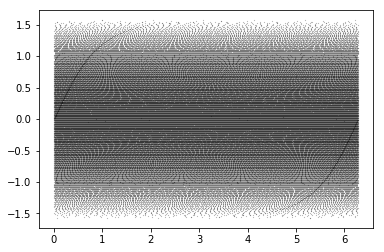

In [3]:
plt.plot(ras, decs, 'ko', markersize=.1)


In [4]:
# Let's try out making a feature and updating it with an observation at each of these pointings
nside=512
count_feature = fs.N_observations(nside=nside, filtername='r')
hpLookup = fs.hp_in_comcam_fov(nside=nside)

In [5]:
indices = hpLookup(ras[0], decs[0], 0.)
observation = fs.empty_observation()
observation['filter'] = 'r'
#for ra, dec in zip(ras[::4], decs[::4]):
for ra, dec in zip(ras, decs):

    indices = hpLookup(ra, dec, np.radians(0))
    count_feature.add_observation(observation, indx=indices)

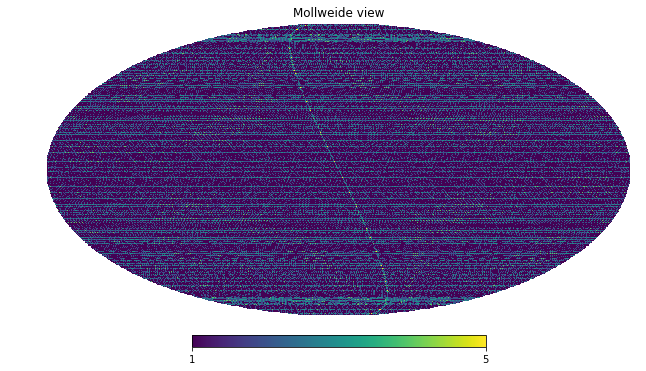

In [6]:
hp.mollview(count_feature.feature)

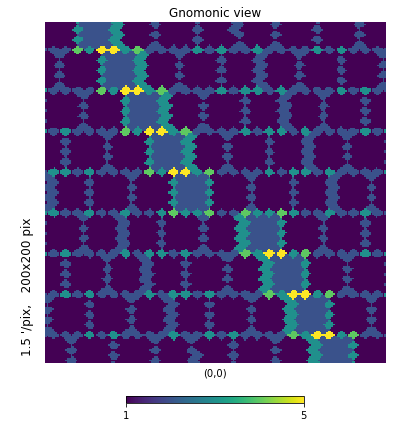

In [7]:
hp.gnomview(count_feature.feature, rot=(0,0,0))

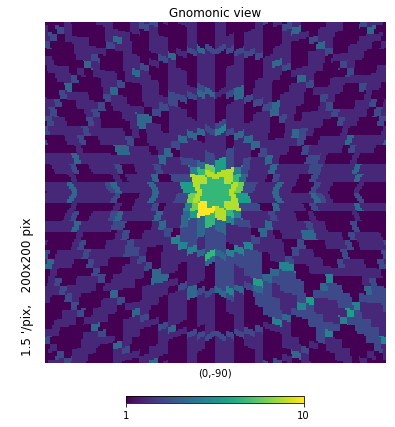

In [8]:
hp.gnomview(count_feature.feature, rot=(0,-90,0))

In [9]:
count_feature.feature.min()

1.0

In [10]:
# OK, let's try again, but use the survey to spin the fields and make sure things still work
greedy_survey = fs.Greedy_survey_comcam([], [])
greedy_survey._spin_fields()# (lon=0., lat=0.3)
ras = greedy_survey.fields['RA']
decs = greedy_survey.fields['dec']
rots = greedy_survey.fields['rotSkyPos']

In [11]:
nside=1024
count_feature = fs.N_observations(nside=nside, filtername='r')
hpLookup = fs.hp_in_comcam_fov(nside=nside)

observation = fs.empty_observation()
observation['filter'] = 'r'
#for ra, dec in zip(ras[::4], decs[::4]):
for i,ra in enumerate(ras):
    indices = hpLookup(ras[i], decs[i], rots[i])
    count_feature.add_observation(observation, indx=indices)

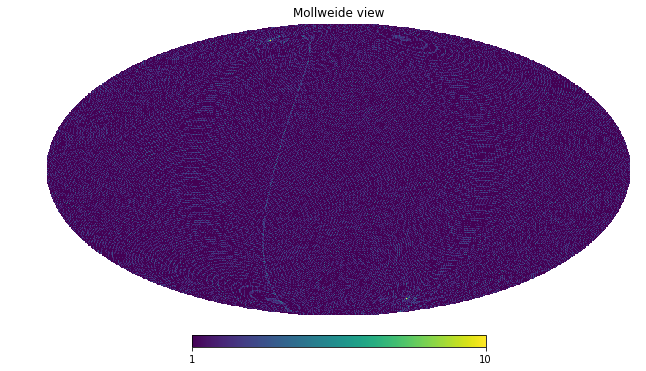

In [12]:
hp.mollview(count_feature.feature)

In [13]:
count_feature.feature.min()

1.0

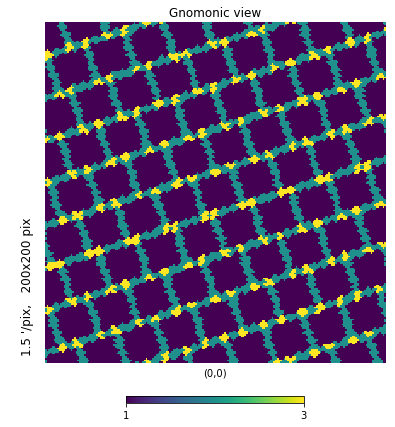

In [14]:
hp.gnomview(count_feature.feature, rot=(0,0,0))

(array([  0.00000000e+00,   8.24271500e+06,   3.50399400e+06,
          7.47417000e+05,   8.58930000e+04,   2.49000000e+03,
          9.50000000e+01,   1.44000000e+02,   3.50000000e+01]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5]),
 <a list of 9 Patch objects>)

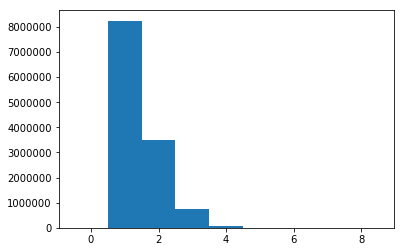

In [15]:
plt.hist(count_feature.feature, bins=np.arange(10)-.5)

In [16]:
np.where(count_feature.feature == 0)[0].size

0

In [17]:
greedy_survey.fields['rotSkyPos']

array([ 6.05999037,  6.05779384,  6.05562262, ...,  5.02734446,
        3.98046946,  2.93359446])

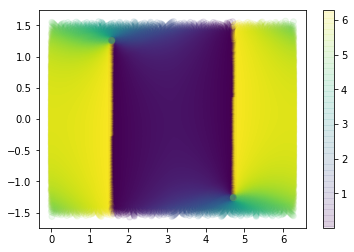

In [18]:
plt.scatter(ras, decs, c=rots, alpha=.1)
plt.colorbar()

In [19]:
greedy_survey.fields['rotSkyPos'].min(), greedy_survey.fields['rotSkyPos'].max()

(9.0380487485219874e-06, 6.28317854873145)